# Explore GrandTour Data using HuggingFace 🤗
© 2025 ETH Zurich

 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/leggedrobotics/grand_tour_dataset/blob/main/examples/%5B1%5D_Exploring_GrandTour_Data.ipynb)

## Setup

> Note: This notebook uses the [ZARR](https://zarr.dev/) file format for maximum compatibility, but ROS users can apply the information here to ROSbag data as the data fields are the same across all formats.
**Installation instructions** for jupyter-notebook and the requreid installation is available in the README.md 

## What's in a Mission?

A mission consists of a single continuous deployment of the robot. The sensor data from Boxi and from the ANYmal D base platform are available. 
The full list of sensors on **Boxi** and the **ANYmal D** can be seen on the [GrandTour webpage](https://grand-tour.leggedrobotics.com/setup).
All **Missions** will have the same data fields, except where it was impossible to collect (eg: GNSS data indoors). Any anoamalies from the default datastructure are provided as a **Note** in the explorer available on the webpage. 
[Explore the dataset for Mission ETH-1](https://grand-tour.leggedrobotics.com/dataset#mission-1-on).

<div style="text-align: center;">
  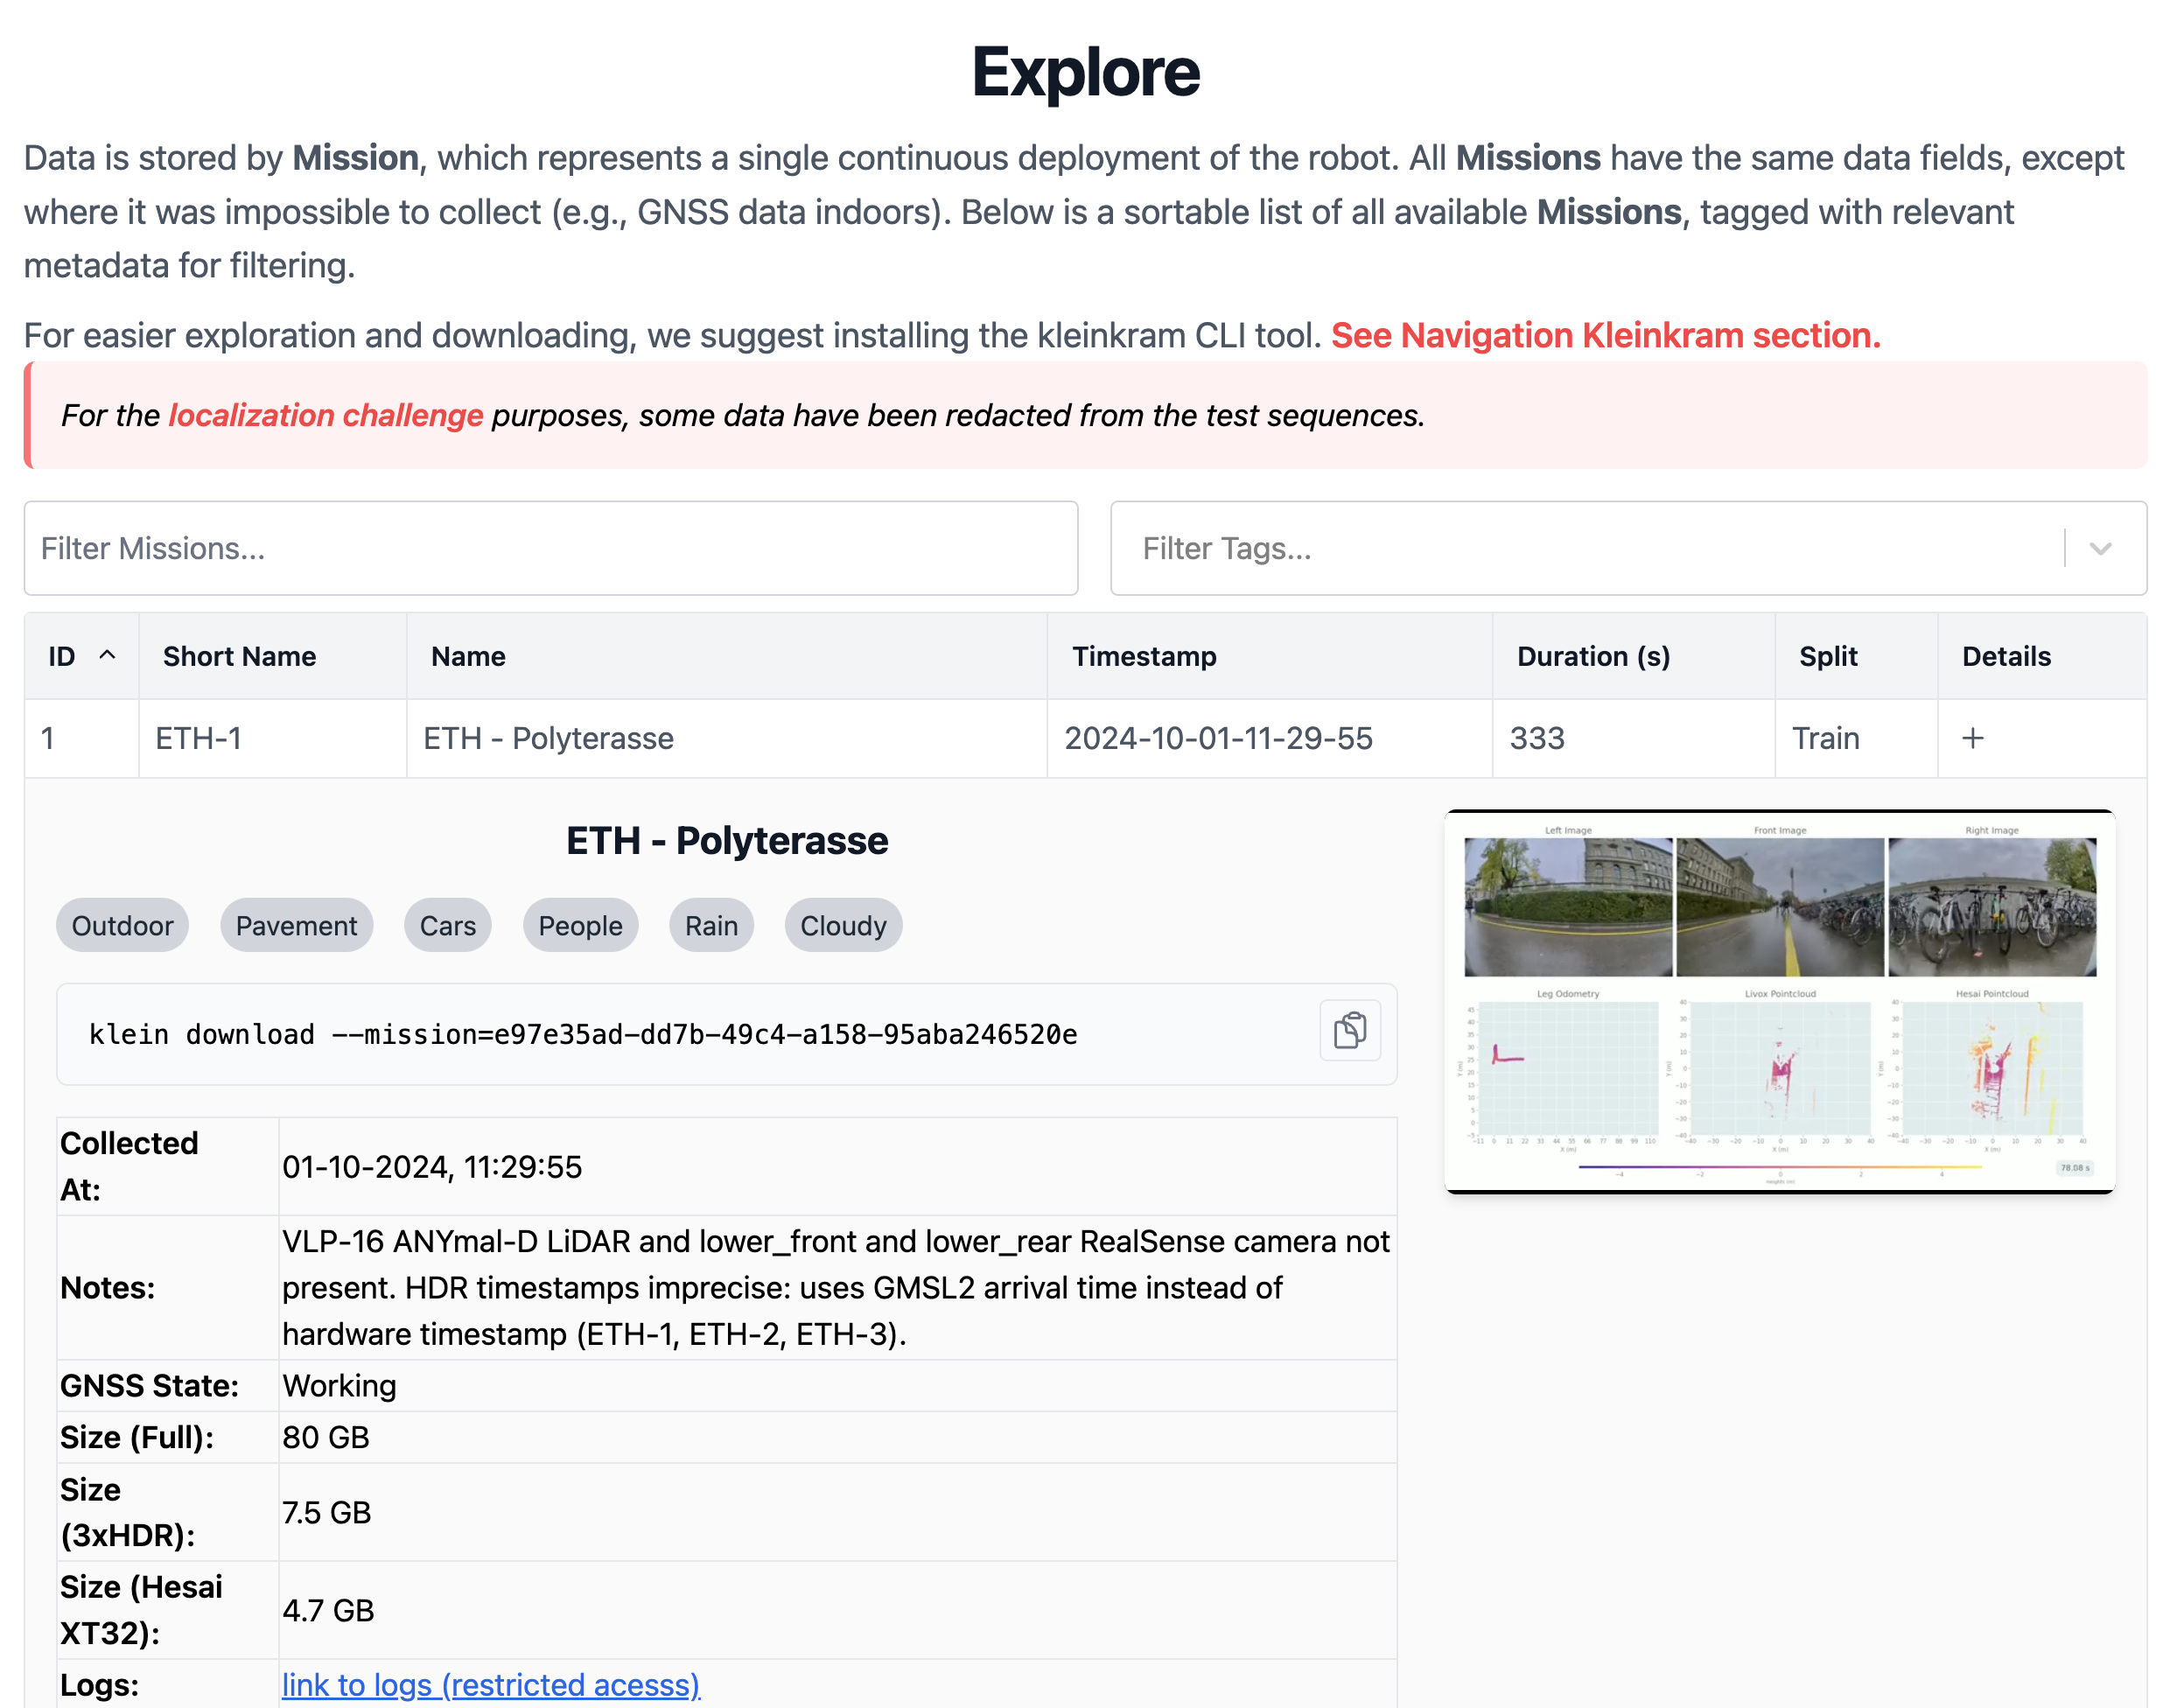
</div>


> An overview of the missions and preview videos are available at: https://grand-tour.leggedrobotics.com/data

> Mission Identifier: Each mission has a timestamp in the format: `JJJJ-MM-DD-hh-mm-ss` and a unique tag e.g. `ETH-1`.

> Each mission is categorized into `train`, `val`, or `test` data.
> 
> For `train` and `val` all data is available.
> For `test` missions we removed accurate position data from Leica MS60 Totalstation and Novatle CPT7 GNSS and IMU data.
> The validation dataset is used in the examples (see. LiO, ViO benchmark) but can be treated the same as the training missions. 

## Getting Started
> This tutorial assumes you have the 2024-10-01-11-29-55 mission locally downloaded and extracted from the `.tar` files into `.zarr` and `.png` format. See the first tutorial - `examples_hugging_face/access.ipynb`.

In [9]:
import zarr
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("Your zarr version: ", zarr.__version__, " -- Tutorial is tested with 3.0.7")


mission = "2024-11-02-17-18-32"
mission = "2024-10-01-11-29-55"

# Should be path to the dataset folder that holds all missions
grand_tour_folder = Path("~/grand_tour_dataset").expanduser()

# Specifc mission with ./data and ./images folder
mission_folder = grand_tour_folder / mission

mission_root = zarr.open_group(store=mission_folder / "data", mode='r')

# List group members
print("Zarr root keys:", list(mission_root.keys()))
mission_root

Your zarr version:  3.0.7  -- Tutorial is tested with 3.0.7
Zarr root keys: ['adis_imu', 'zed2i_depth_confidence_image', 'dlio_map_odometry', 'zed2i_left_images', 'zed2i_depth_image', 'ap20_imu', 'zed2i_right_images', 'livox_imu', 'hesai_undistorted', 'dlio_hesai_points_undistorted', 'stim320_gyroscope_temperature', 'alphasense_right', 'gnss_raw_cpt7_ie_tc', 'dlio_tf', 'anymal_imu', 'anymal_state_battery', 'stim320_accelerometer_temperature', 'hesai', 'depth_camera_left', 'prism_position', 'cpt7_ie_rt_tf', 'anymal_state_state_estimator', 'anymal_state_actuator', 'cpt7_ie_rt_odometry', 'depth_camera_rear_upper', 'cpt7_imu', 'alphasense_front_center', 'cpt7_ie_tc_tf', 'anymal_command_twist', 'depth_camera_front_upper', 'livox_points_undistorted', 'gnss_raw_cpt7_ie_rt', 'alphasense_front_left', 'stim320_imu', 'alphasense_left', 'livox_points', 'navsatfix_cpt7_ie_tc', 'cpt7_ie_tc_odometry', 'hdr_left', 'alphasense_imu', 'anymal_state_odometry', 'alphasense_front_right', 'depth_camera_right

<Group file:///home/jonfrey/grand_tour_dataset/2024-10-01-11-29-55/data>

## Quick Introduction to Zarr Files

* **Zarr** is a hierarchical data structure designed for efficiently storing multi-dimensional arrays.
* A Zarr file is subdivided into **groups**, each representing a separate sensor message.
* Each group contains the data and metadata specific to its corresponding sensor message.
* **Persistent metadata**—such as calibration parameters, `frame_id`, and other relevant information—is stored as **group attributes**.
* The only data not stored directly in Zarr format are **images**, which are saved separately as `.jpeg` or `.png` files for compatibility.

In [2]:
# Each sensor message is a seperate group
print( "Zarr group: ", mission_root["alphasense_front_center"] )

print("\n\033[1mAccessing Data for `timestamp`:\033[0m")
timestamp = mission_root["alphasense_front_center"]["timestamp"]
print("    - shape: ", timestamp.shape)
print("    - dtype: ", timestamp.dtype)
print("    - type:  ", type(timestamp))
print("    - value: ", mission_root["alphasense_front_center"]["timestamp"][0], " for idx [0]")


print("\n\033[1mAttribute Examples:\033[0m")
for k,v in mission_root["alphasense_front_center"].attrs.items():
    print(f"    - attributes:    {k}")

print("\n\033[1mAttribute Values:\033[0m")
print(f"    - frame_id:     ", mission_root["alphasense_front_center"].attrs["frame_id"])
print(f"    - description:  ", mission_root["alphasense_front_center"].attrs["description"])


print("\n\033[1mOverview of mission_root:\033[0m")

keys =  list( mission_root.keys())
sorted( keys )

for k in keys:
    print(f"Topic/Key: \033[1m{k}\033[0m")
    
    print("   Data Fields:     ", sorted(list(mission_root[k].keys())))
    print("   Data Attributes: ", list( mission_root[k].attrs))
    print("   Description:     ", mission_root[k].attrs["description"])

    
    print("")

Zarr group:  <Group file:///home/jonfrey/grand_tour_dataset/2024-11-02-17-18-32/data/alphasense_front_center>

Accessing Data for `timestamp`:
    - shape:  (5,)
    - dtype:  float64
    - type:   <class 'zarr.core.array.Array'>
    - value:  1730564421.887596  for idx [0]

Attribute Examples:
    - attributes:    camera_info
    - attributes:    description
    - attributes:    frame_id
    - attributes:    topic
    - attributes:    transform

Attribute Values:
    - frame_id:      alphasense_front_center
    - description:   10Hz - 1440x1080 - Sevensense Alphasense/CoreResearch front center (Sony IMX-273, Color, 1.6MP)

Overview of mission_root:
Topic/Key: adis_imu
   Data Fields:      ['ang_vel', 'ang_vel_cov', 'lin_acc', 'lin_acc_cov', 'orien', 'orien_cov', 'sequence_id', 'timestamp']
   Data Attributes:  ['description', 'frame_id', 'topic', 'transform']
   Description:      Analog Devices ADIS16475-2 200Hz

Topic/Key: zed2i_depth_confidence_image
   Data Fields:      ['sequence_

### 📷 Image Data

This section describes how to access image data, including metadata such as `timestamp`, `frame_id`, and `intrinsics`.
The image data is stored in a seperate folder as .png or .jpeg encoded individual files.
Depending on the python libaries please ensure the image is loaded with the correct encoding.
We tested everything using imageio.


#### 🔖 Available `image_tag` Options

##### **RGB Cameras**

* `alphasense_front_center`
* `alphasense_left`
* `alphasense_right`
* `hdr_left`
* `hdr_front`
* `hdr_right`
* `zed2i_left_images`
* `zed2i_right_images`

##### **Mono Cameras**

* `alphasense_front_left`
* `alphasense_front_right`

##### **Depth Cameras**

* `zed2i_depth_confidence_image`
* `zed2i_depth_image`
* `depth_camera_front_lower`
* `depth_camera_rear_lower`
* `depth_camera_front_upper`
* `depth_camera_rear_upper`
* `depth_camera_left`
* `depth_camera_right`


Total Images:  (5,)


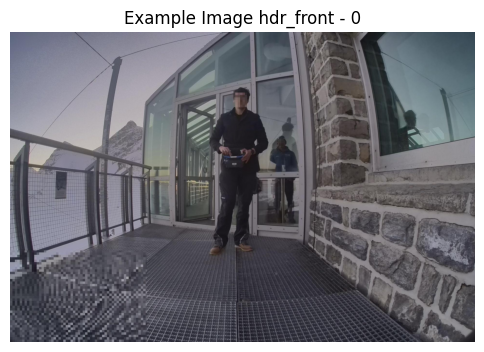

Frame ID of image:  hdr_front
Camera Intrinsic Matrix - K:  [984.407734999804, 0.0, 952.3920462113495, 0.0, 983.8103917846685, 638.6385463949282, 0.0, 0.0, 1.0]
Camera Distortion Model:  equidistant
Camera Distortion Parameter:  [-0.06150262047071293, 0.003455916289334078, -0.001233506511528716, -1.770797322903057e-07]
Static Transform: {'base_frame_id': 'box_base', 'child_frame_id': 'hdr_front', 'rotation': {'w': 0.4970495903927929, 'x': -0.499305922637098, 'y': -0.5005829735777374, 'z': -0.5030427286761467}, 'translation': {'x': 0.04836030494808155, 'y': -0.10282483832595525, 'z': -0.36926064730524666}}

         sequence_id is the ros_message stamp during runtime (is not required to start from 0)
         image_id    is assigned when converting to png/jpeg format start counting from 0 per mission


In [3]:
import imageio
import matplotlib.pyplot as plt

image_tag = "hdr_front"
image_id = 0

print("Total Images: ", mission_root[image_tag]["sequence_id"].shape)

sequence_id = mission_root[image_tag]["sequence_id"][image_id]
image_path = mission_folder / "images" / image_tag / f"{image_id:06d}.jpeg"
image = imageio.imread(image_path)

# # Display the result using Matplotlib.
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title(f"Example Image {image_tag} - {image_id}")
plt.show()

# Camera Info 
print("Frame ID of image: ", mission_root[image_tag].attrs["frame_id"])
print("Camera Intrinsic Matrix - K: ", mission_root[image_tag].attrs["camera_info"]["K"])
print("Camera Distortion Model: ", mission_root[image_tag].attrs["camera_info"]["distortion_model"])
print("Camera Distortion Parameter: ", mission_root[image_tag].attrs["camera_info"]["D"])
print("Static Transform:", mission_root[image_tag].attrs["transform"])
print()
print("WARNING: The camera calibration (intrinsic & extrinsic) changes between missions of the GrandTour dataset!")
print("WARNING: sequence_id != image_id")
print("         sequence_id is the ros_message stamp during runtime (is not required to start from 0)")
print("         image_id    is assigned when converting to png/jpeg format start counting from 0 per mission")

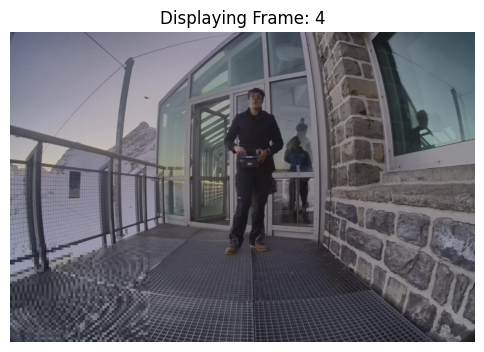

In [6]:
# Creating a video
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

image_tag = "hdr_front"
# Define image directory
camera_images_dir = mission_folder / "images" / image_tag

# Set the start index
start_idx = 0  # Change this to any starting index
num_frames = 50  # Number of frames to display

# Get sorted list of image files
image_files = sorted([f for f in os.listdir(camera_images_dir) if f.endswith((".jpeg"))])
selected_files = image_files[start_idx:start_idx + num_frames]

# Loop through selected images
for idx, filename in enumerate(selected_files, start=start_idx):
    img = cv2.imread(os.path.join(camera_images_dir, filename))
    
    # Convert BGR to RGB for proper color display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Clear previous output (for smooth playback)
    clear_output(wait=True)

    # Display new image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title(f"Displaying Frame: {idx}")
    plt.show()

    # Wait before showing the next image
    cv2.waitKey(50)  # Adjust speed (50ms per frame)

In [8]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

image_tag = "depth_camera_front_lower"
image_id = 0
sequence_id = mission_root[image_tag]["sequence_id"][image_id]
image_path = mission_folder / "images" / image_tag / f"{image_id:06d}.png"

print(image_path)
depth_image = imageio.imread(image_path).astype(np.float32) / 1000.0 # convert from mm to m. 

# # Display the result using Matplotlib.
plt.figure(figsize=(6, 3))
masked_depth = np.ma.masked_equal(depth_image, 0)
# Create colormap: viridis with 0 masked as black
cmap = plt.get_cmap('viridis')
cmap.set_bad(color='black') 

# Plot
plt.imshow(masked_depth, cmap=cmap, vmin=0, vmax=5)
plt.colorbar(label='Depth (m)')
plt.title('Depth Image')
plt.axis('off')

plt.show()

/home/jonfrey/grand_tour_dataset/2024-11-02-17-18-32/images/depth_camera_front_lower/000000.png


FileNotFoundError: No such file: '/home/jonfrey/grand_tour_dataset/2024-11-02-17-18-32/images/depth_camera_front_lower/000000.png'

### Depth Image to Pointcloud

In [ ]:
import open3d as o3d
import plotly.graph_objects as go

# Load Data
image_tag = "depth_camera_right"
image_id = 0
image_path = mission_folder / "images" / image_tag / f"{image_id:06d}.png"
depth_image = imageio.imread(image_path).astype(np.float32) / 1000.0
K = np.array( mission_root[image_tag].attrs["camera_info"]["K"]).reshape(3,3)

# Convert to pointcloud using o3d 
depth_o3d = o3d.geometry.Image(depth_image )
height, width = depth_image.shape
intrinsic = o3d.camera.PinholeCameraIntrinsic()
intrinsic.set_intrinsics(
    width=width,
    height=height,
    fx=K[0, 0],
    fy=K[1, 1],
    cx=K[0, 2],
    cy=K[1, 2]
)
pcd = o3d.geometry.PointCloud.create_from_depth_image(
    depth_o3d,
    intrinsic,
    depth_scale=1.0,      # Already in meters
    depth_trunc=5.0,      # Max depth (clipping)
    stride=1              # Use every pixel
)
# Remove points with nan/inf or 0 (optional but safe)
pcd = pcd.remove_non_finite_points()


# Create 3D scatter plot for LiDAR point cloud
points = np.asarray(pcd.points)
sub = 100 # only plot every 100 point
x, y, z = points[::sub, 0], points[::sub, 1], points[::sub, 2]
z_min, z_max = z.min(), z.max()
colorscale = (z - z_min) / (z_max - z_min)  # Normalize between 0 and 1

fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode="markers",
    marker=dict(
        size=2,
        color=colorscale,  # Color based on height
        colorscale="Viridis",  # Use a perceptually uniform colormap
        opacity=0.8
    ),
    name=mission_root[image_tag].attrs["description"]
))
fig.show()

print("Note: The data is provided in the sensor's origin frame. The camera is tilted downward toward the ground, and the left and right portions of the field of view are obstructed by the legs.")

Note: The data is provided in the sensor's origin frame. The camera is tilted downward toward the ground, and the left and right portions of the field of view are obstructed by the legs.

### LiDAR Data

> We provide point cloud data for all LiDARs.  
> Available LiDARs: `hesai`, `velodyne`, `livox`.
> We provide raw data and undistorted (motion compensated pointclouds `_undistorted`).  
> We use the robust and locally accurate Leg-Intertial-Odometry estimate provided by ANYmal.
> For the Hesai we additionally provide undistorted pointclouds using Direct LiDAR Intertial Odometry (DLIO) `dlio_hesai_points_undistorted`  
> LiDARs record a varying number of points per scan - To store the data in a zarr-file we "buffer" them to the same shape and provide the last `valid` point as an index per pointcloud.  

In [ ]:
lidar_tag = "hesai" # "velodyne", "livox", 
                    # "hesai_undistorted", "velodyne_undistorted", "livox_undistorted"
                    # "dlio_hesai_points_undistorted"

print("Available Fields: ", list(mission_root[lidar_tag].keys()))
print("Description: ", mission_root[lidar_tag].attrs["description"])

idx = 1000
v = int(mission_root[lidar_tag]["valid"][idx])
points = mission_root[lidar_tag]["points"][idx, :v, :]
x, y, z = points[:,0],points[:,1],points[:,2]
print("Number valid points: ", v)

# Colorscale based on height
z_min, z_max = z.min(), z.max()
colorscale = (z - z_min) / (z_max - z_min)

# Create 3D scatter plot for LiDAR point cloud
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode="markers",
    marker=dict(
        size=1,
        color=colorscale,  
        colorscale="Viridis",
        opacity=0.8
    ),
    name="LiDAR Point Cloud"
))

max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x = (x.max() + x.min()) / 2.0
mid_y = (y.max() + y.min()) / 2.0
mid_z = (z.max() + z.min()) / 2.0

fig.update_layout(
    title="LiDAR Point Cloud Visualization",
    scene=dict(
        xaxis=dict(range=[mid_x - max_range, mid_x + max_range], title="X"),
        yaxis=dict(range=[mid_y - max_range, mid_y + max_range], title="Y"),
        zaxis=dict(range=[mid_z - max_range, mid_z + max_range], title="Z"),
        camera=dict(
            eye=dict(x=0.07, y=0.44, z=-0.02),  # Camera position
            center=dict(x=0, y=0, z=-0.1)  # Look at
        )
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

### Position Data
> We provide sub-cm precise Ground Truth position data.  
> Position data is available during direct line-of-sight between *Boxi* and Leica Geosystem`s MS60 Totalstation.

In [ ]:
#@title Plot Trajectory
import plotly.graph_objects as go
import numpy as np

# Extract X, Y, Z coordinates
x, y, z = ground_truth_numpy[:, 0], ground_truth_numpy[:, 1], ground_truth_numpy[:, 2]

# Create a 3D scatter plot with a trajectory line
fig = go.Figure()

# Add trajectory line
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode="lines",
    line=dict(color="blue", width=3),
    name="Trajectory"
))

# Add start & end points
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode="markers",
    marker=dict(size=8, color="green"),
    name="Start"
))

fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode="markers",
    marker=dict(size=8, color="red"),
    name="End"
))

# Compute axis limits to ensure equal scale
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x = (x.max() + x.min()) / 2.0
mid_y = (y.max() + y.min()) / 2.0
mid_z = (z.max() + z.min()) / 2.0

# Update layout with equal axis scaling
fig.update_layout(
    title="3D ANYmal D Trajectory (Z Axis Scale Enlarged)",
    scene=dict(
        xaxis=dict(range=[mid_x - max_range, mid_x + max_range]),
        yaxis=dict(range=[mid_y - max_range, mid_y + max_range]),
        zaxis=dict(range=[mid_z - max_range /10 , mid_z + max_range / 10]),
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


## Fusing Sensor Data
> We provide camera intrinsic and extrinsic calibration data, as well as transforms between the frames of the various sensors.


### Calibration (Camera Intrinsic and Sensor Frame Transformation) Data

Calibration data can be found in `.yaml` format in the `/metadata` directory of the HuggingFace datasets, as well as in ROSbag format in TODO. The calibrations can vary by mission, so make sure you have the correct data for your purposes.

Enter the path to the local `.yaml` file.

In [ ]:
import os
# Path to the calibration YAML file for the camera.
camera_calib_file_path = mission_folder + "/metadata/hdr_front.yaml"

We can define a function to extract homogenous transformation matrices from the `.yaml` data:

In [ ]:
def homogenous_transformation_matrix(calib_data):
    # Extract translation
    t = np.array([
        calib_data["transform"]["translation"]["x"],
        calib_data["transform"]["translation"]["y"],
        calib_data["transform"]["translation"]["z"]
    ])

    # Extract quaternion (given in [w, x, y, z] format)
    q = np.array([
        calib_data["transform"]["rotation"]["w"],
        calib_data["transform"]["rotation"]["x"],
        calib_data["transform"]["rotation"]["y"],
        calib_data["transform"]["rotation"]["z"]
    ])

    # Convert quaternion to rotation matrix.
    # Note: SciPy expects the quaternion in [x, y, z, w] order.
    rot = R.from_quat([q[1], q[2], q[3], q[0]])
    R_matrix = rot.as_matrix()

    # Construct the 4x4 homogeneous transformation matrix.
    T = np.eye(4)
    T[:3, :3] = R_matrix
    T[:3, 3] = t

    return T

We can inspect the available intrinsic camera calibration data in the file. Transformations from each sensor to the box base are also given, which we can look at below.

In [ ]:
import os
import yaml
import numpy as np
import pprint
from scipy.spatial.transform import Rotation as R

# Load the calibration file
with open(camera_calib_file_path, 'r') as f:
    camera_calib_data = yaml.safe_load(f)

pprint.pprint(f"Available Data: {', '.join(camera_calib_data.keys())}")

K = np.array(camera_calib_data["camera_info"]["K"]).reshape(3, 3)
print("\nCamera Intrinsics (K):")
pprint.pprint(K)

D = np.array(camera_calib_data["camera_info"]["D"])
print("\nCamera Distortion Coefficients (D):")
pprint.pprint(D)

T_base_camera = homogenous_transformation_matrix(camera_calib_data)

print("\nHomogenous Transformation Matrix:")
print(T_base_camera)


In [ ]:
In order to fuse LiDAR with the hdr_front camera, we will also need the LiDAR's transformation from the base frame:

In [ ]:
lidar_calib_file_path = mission_folder + "/metadata/dlio.yaml"

with open(lidar_calib_file_path, 'r') as f:
    lidar_calib_data = yaml.safe_load(f)

T_base_lidar = homogenous_transformation_matrix(lidar_calib_data)

print("\nHomogenous Transformation Matrix:")
print(T_base_lidar)

### Camera + LiDAR Fusion Example

Now that we have camera, LiDAR and calibration data, we can fuse them and display the pointcloud on the imagery.

#### Helper Functions

In [ ]:
#@title Helper Functions
import cv2
import numpy as np
import matplotlib.pyplot as plt

def overlay_pcd_on_image(image, xyz_points, K, D, transform=None):
    """
    Overlays 3D LiDAR points (colored by depth) onto a camera image.

    Parameters:
    - image (np.ndarray): The camera image (assumed to be in RGB format).
    - xyz_points (np.ndarray): LiDAR points (N, 3) in the LiDAR frame.
    - K (np.ndarray): Camera intrinsic matrix (3x3).
    - D (np.ndarray): Distortion coefficients (e.g., for fisheye).
    - transform (np.ndarray, optional): 4x4 transformation matrix to convert 
                                        LiDAR points to camera frame. Defaults to None.

    Returns:
    - output_image (np.ndarray): The image with overlaid LiDAR points.
    """
    # If a transformation is provided, convert points to the camera frame.
    if transform is not None:
        ones = np.ones((xyz_points.shape[0], 1))
        xyz_hom = np.hstack((xyz_points, ones))
        xyz_transformed = (transform @ xyz_hom.T).T[:, :3]
    else:
        xyz_transformed = xyz_points

    # Only keep points in front of the camera (positive z).
    xyz_transformed = xyz_transformed[xyz_transformed[:, 2] > 0]
    
    # Project 3D points to 2D using the fisheye model.
    projected_points, _ = cv2.fisheye.projectPoints(
        xyz_transformed[:, None, :],  # reshape to (N,1,3)
        np.zeros(3),  # zero rotation vector
        np.zeros(3),  # zero translation vector
        K,
        D
    )
    projected_points = projected_points.squeeze(axis=1)  # reshape to (N,2)

    # Map depth to color: we'll use the z-value for colorization.
    depths = xyz_transformed[:, 2]
    normalized_depths = (depths - depths.min()) / (depths.max() - depths.min() + 1e-6)
    # Enhance contrast by taking a square root (optional)
    normalized_depths = np.sqrt(normalized_depths)
    colors = cv2.applyColorMap((normalized_depths * 255).astype(np.uint8), cv2.COLORMAP_TURBO)

    # Create a copy of the image to overlay points.
    output_image = image.copy()

    # Overlay each projected point onto the image.
    for pt, color in zip(projected_points, colors):
        x, y = int(round(pt[0])), int(round(pt[1]))
        # Check if point falls within image bounds.
        if 0 <= x < output_image.shape[1] and 0 <= y < output_image.shape[0]:
            cv2.circle(output_image, (x, y), radius=2, color=tuple(int(c) for c in color.flatten().tolist()), thickness=-1)
    
    return output_image




#### Final Composite

In [ ]:
# Here:
# - 'img' is the camera image loaded as a NumPy array in RGB format.
# - 'lidar_points' is the LiDAR point cloud as an (N, 3) NumPy array.
# - 'K' and 'D' are the camera's intrinsic matrix and distortion coefficients.
# - 'T_lidar_to_camera' is a 4x4 transformation from the LiDAR frame to the camera frame.

# Compute the inverse of T_base_camera to get T_camera_base
T_camera_base = np.linalg.inv(T_base_camera)

# Combine to get the transformation from LiDAR to Camera frame
T_camera_lidar = T_camera_base @ T_base_lidar

# Use the lidar poiints from the earlier example
lidar_points = undistorded_lidar_numpy
# Use the front HDR image from the earlier example
img = cv2.imread(os.path.join(tier4_front_dir, image_files[0]))

# # Overlay the LiDAR points on the image.
overlay_image = overlay_pcd_on_image(img, lidar_points, K, D, transform=T_camera_lidar)

# # Display the result using Matplotlib.
plt.figure(figsize=(10, 8))
plt.imshow(overlay_image)
plt.axis("off")
plt.title("LiDAR Points Overlaid on Camera Image")
plt.show()